In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Load data dan preprocsessing

data = pd.read_csv('archive/daily/AALI.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [ ]:
# split dataset

train_size = int(len(data) * 0.8)
data_train, data_test = data[:train_size], data[train_size:]

In [ ]:
# buat input sequence untuk ANN input

def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length].flatten())
        targets.append(data[i + seq_length, 3])
    return np.array(sequences), np.array(targets)

seq_length = 60
X_train, y_train = create_sequences(data_train.values, seq_length)
X_test, y_test = create_sequences(data_test.values, seq_length)

In [ ]:
# split data menjadi validation data dan train data

train_val_split = int(len(X_train) * 0.8)
X_train_final, X_val = X_train[:train_val_split], X_train[train_val_split:]
y_train_final, y_val = y_train[:train_val_split], y_train[train_val_split:]

In [ ]:
# membuat model dan compile model

model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

f:\KULIAH\SEM 4\MachineLearning\FinalProject\myvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,201 (137.50 KB)

 Trainable params: 35,201 (137.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training model

history = model.fit(X_train_final, y_train_final, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2847867666432.0000 - val_loss: 23331573760.0000
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 338554519552.0000 - val_loss: 8703715328.0000
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 200715485184.0000 - val_loss: 4254460672.0000
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 114572206080.0000 - val_loss: 2242734080.0000
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45980213248.0000 - val_loss: 1472191616.0000
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36531957760.0000 - val_loss: 958604416.0000
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24075538432.0000 - val_loss: 726640000.0000
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17760917504.0000 - val_loss: 545284736.0000
Epoch 9/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13298043904.0000 - val_loss: 473154208.0000
Epoch 10/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [ ]:
# predict model

train_predictions = model.predict(X_train_final).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# hitung metrics hasil prediksi

mse_train = mean_squared_error(y_train_final, train_predictions)
mape_train = mean_absolute_percentage_error(y_train_final, train_predictions)
r2_train = r2_score(y_train_final, train_predictions)

mse_val = mean_squared_error(y_val, val_predictions)
mape_val = mean_absolute_percentage_error(y_val, val_predictions)
r2_val = r2_score(y_val, val_predictions)

mse_test = mean_squared_error(y_test, test_predictions)
mape_test = mean_absolute_percentage_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f'MSE (Train, Non-normalized): {mse_train:.4f}, MAPE (Train, Non-normalized): {mape_train:.4f}, R² (Train, Non-normalized): {r2_train:.4f}')
print(f'MSE (Validation, Non-normalized): {mse_val:.4f}, MAPE (Validation, Non-normalized): {mape_val:.4f}, R² (Validation, Non-normalized): {r2_val:.4f}')
print(f'MSE (Test, Non-normalized): {mse_test:.4f}, MAPE (Test, Non-normalized): {mape_test:.4f}, R² (Test, Non-normalized): {r2_test:.4f}')

MSE (Train, Non-normalized): 546262891.9370, MAPE (Train, Non-normalized): 4.0381, R² (Train, Non-normalized): -5.7088
MSE (Validation, Non-normalized): 439455511.5045, MAPE (Validation, Non-normalized): 0.9193, R² (Validation, Non-normalized): -52.3685
MSE (Test, Non-normalized): 81883942.3711, MAPE (Test, Non-normalized): 0.7905, R² (Test, Non-normalized): -23.0209


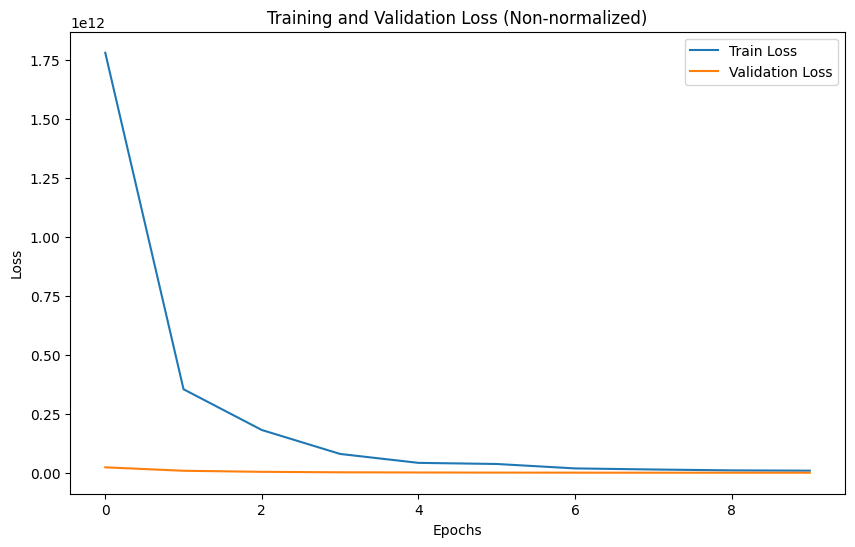

In [ ]:
# plot validation loss

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Non-normalized)')
plt.show()

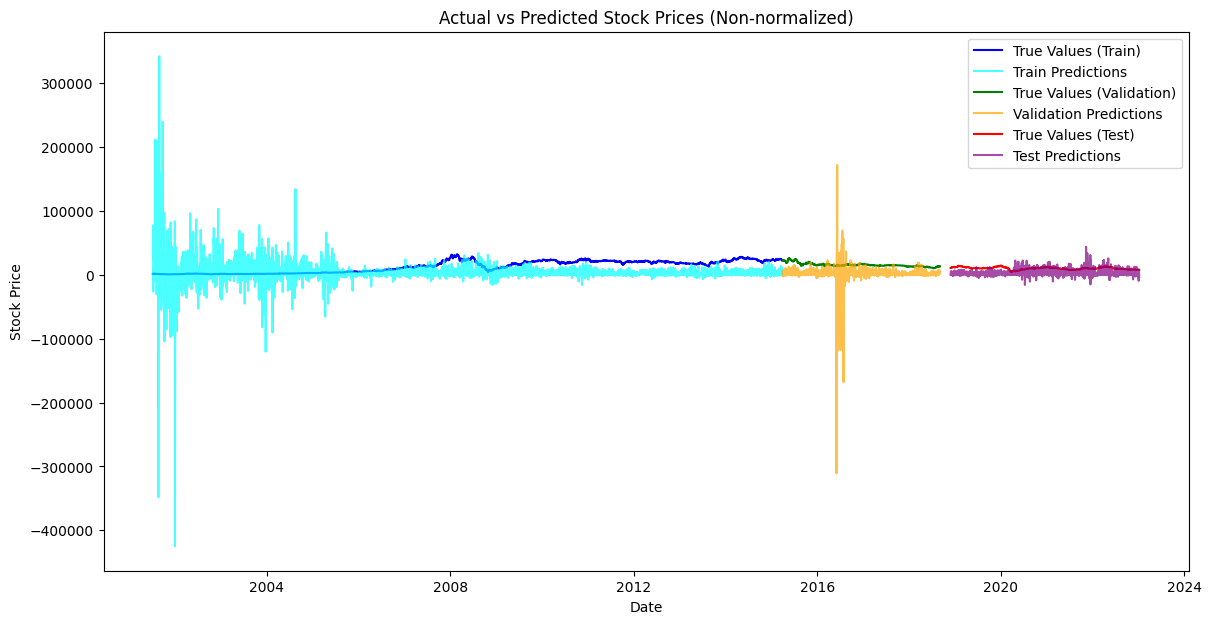

In [ ]:
plt.figure(figsize=(14, 7))
train_dates = data.index[seq_length:train_val_split+seq_length]
val_dates = data.index[train_val_split+seq_length:train_val_split+seq_length+len(val_predictions)]
test_dates = data.index[train_size + seq_length:train_size + seq_length + len(test_predictions)]

plt.plot(train_dates, y_train_final, label='True Values (Train)', color='blue')
plt.plot(train_dates, train_predictions, label='Train Predictions', color='cyan', alpha=0.7)
plt.plot(val_dates, y_val, label='True Values (Validation)', color='green')
plt.plot(val_dates, val_predictions, label='Validation Predictions', color='orange', alpha=0.7)
plt.plot(test_dates, y_test, label='True Values (Test)', color='red')
plt.plot(test_dates, test_predictions, label='Test Predictions', color='purple', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs Predicted Stock Prices (Non-normalized)')
plt.show()